In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('UserBehavior.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# Data Wrangling

In [4]:
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
df.shape

(700, 11)

In [7]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [8]:
df.set_index('User ID', inplace=True)

In [9]:
df.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [10]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [12]:
heat_map = df.copy()

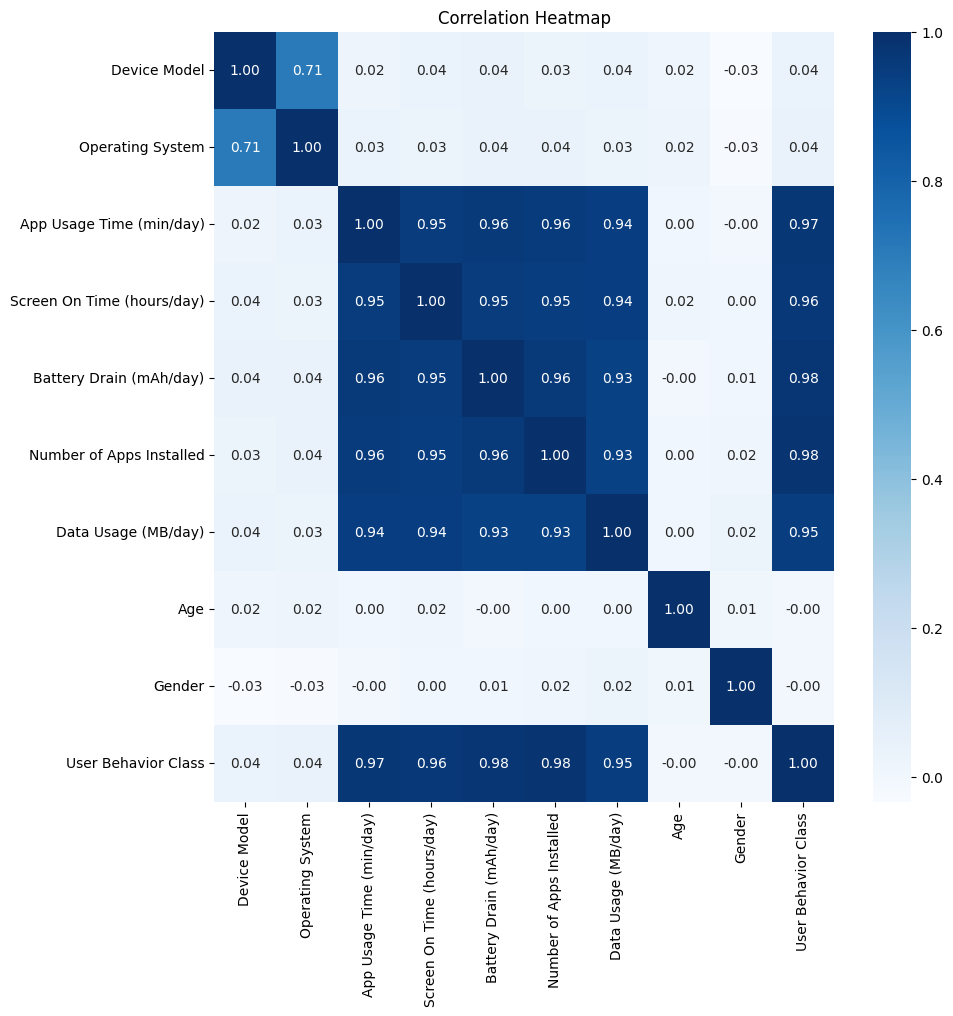

In [13]:
label_encoder = preprocessing.LabelEncoder()

behavior_corr = heat_map.select_dtypes(include='object').columns

for column in behavior_corr:
    heat_map[column] = label_encoder.fit_transform(heat_map[column])

plt.figure(figsize=(10,10))
sns.heatmap(data=heat_map.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [14]:
df['Data Usage (MB/day)'].max()

np.int64(2497)

In [15]:
df['Screen On Time (hours/day)'].max()

np.float64(12.0)

In [16]:
df['Screen On Time (hours/day)'].max()

np.float64(12.0)

In [17]:
df['Number of Apps Installed'].max()

np.int64(99)

<Figure size 5000x5000 with 0 Axes>

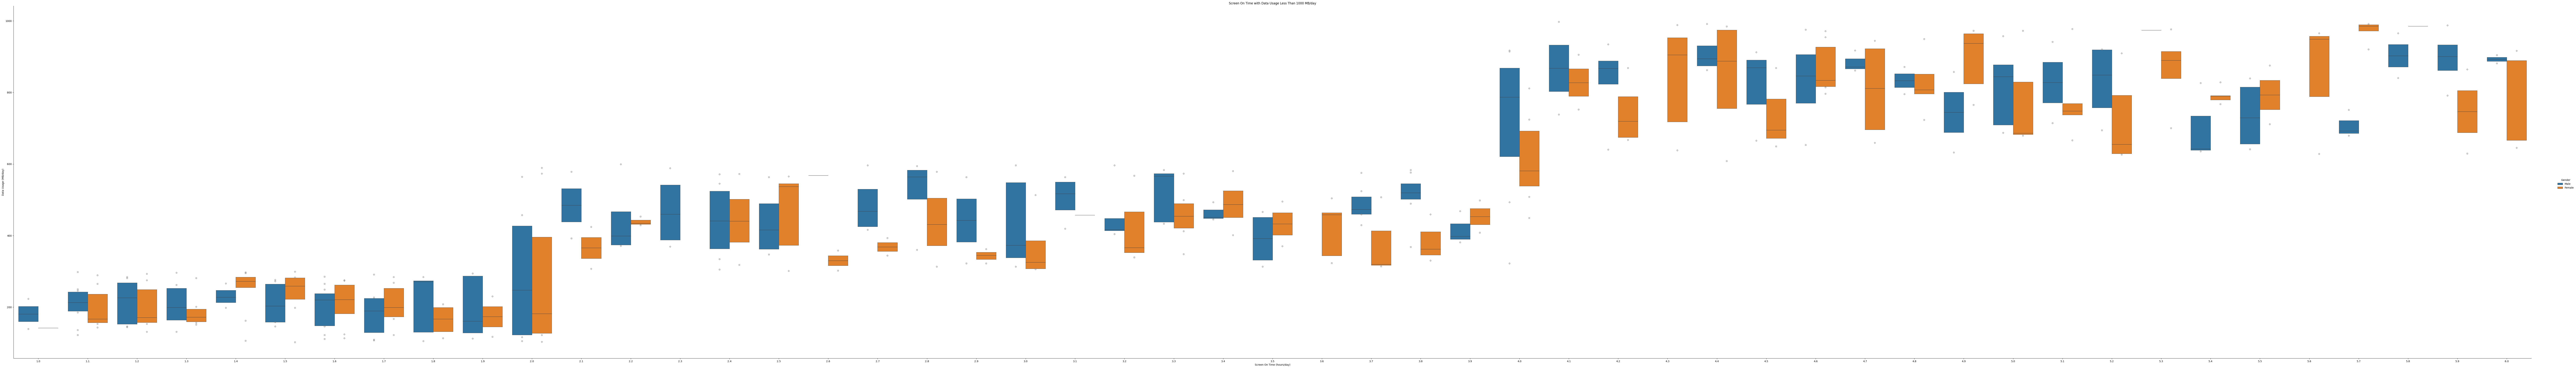

In [38]:
screen_time= df.copy()
screen_time = screen_time[screen_time['Data Usage (MB/day)'] <= 1000]
fig = plt.figure(figsize=(50,50))
sns.catplot(data=screen_time, x='Screen On Time (hours/day)', y='Data Usage (MB/day)', 
            kind='boxen', hue='Gender', height=20, aspect=7)
plt.title('Screen On Time with Data Usage Less Than 1000 MB/day')
plt.show()

<Figure size 10000x10000 with 0 Axes>

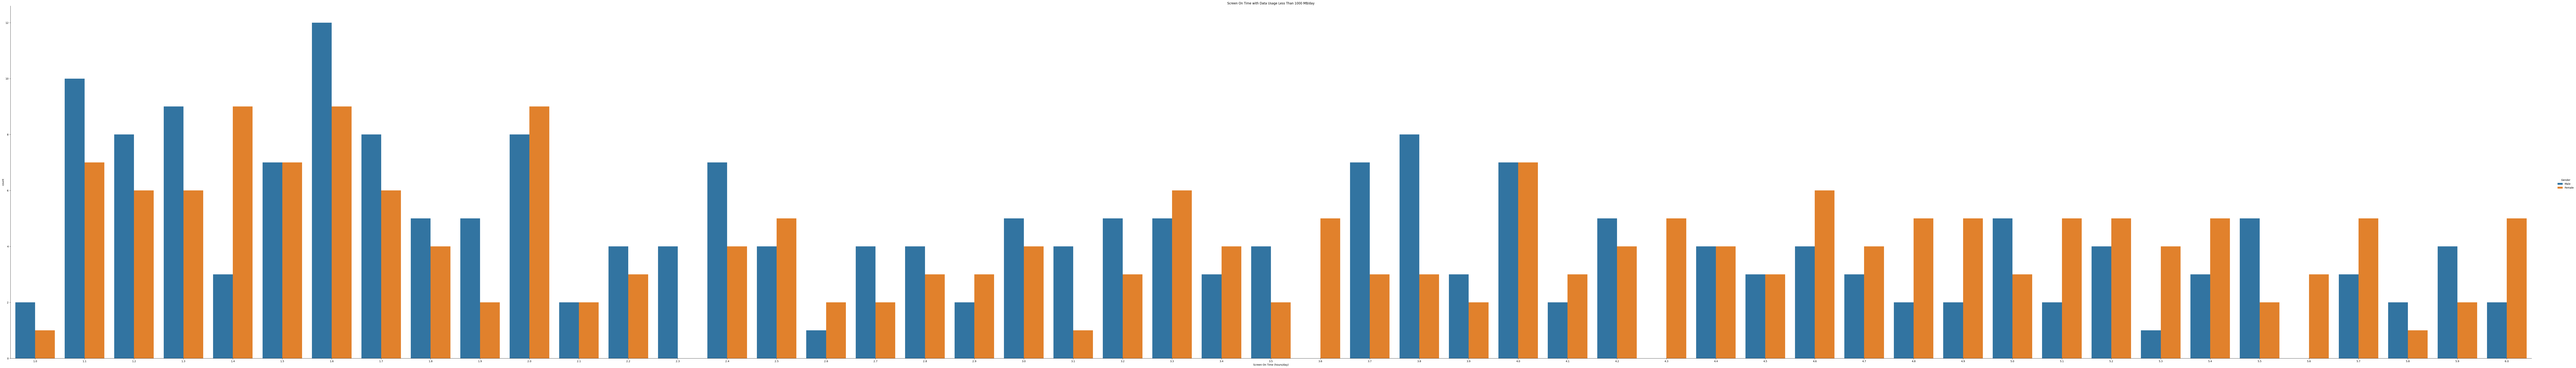

In [41]:
fig = plt.figure(figsize=(100,100))

sns.catplot(data=screen_time, x='Screen On Time (hours/day)', 
            kind='count', hue='Gender', height=20, aspect=7)
plt.title('Screen On Time with Data Usage Less Than 1000 MB/day')
plt.show()

array([[<Axes: title={'center': 'App Usage Time (min/day)'}>,
        <Axes: title={'center': 'Screen On Time (hours/day)'}>,
        <Axes: title={'center': 'Battery Drain (mAh/day)'}>],
       [<Axes: title={'center': 'Number of Apps Installed'}>,
        <Axes: title={'center': 'Data Usage (MB/day)'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'User Behavior Class'}>, <Axes: >,
        <Axes: >]], dtype=object)

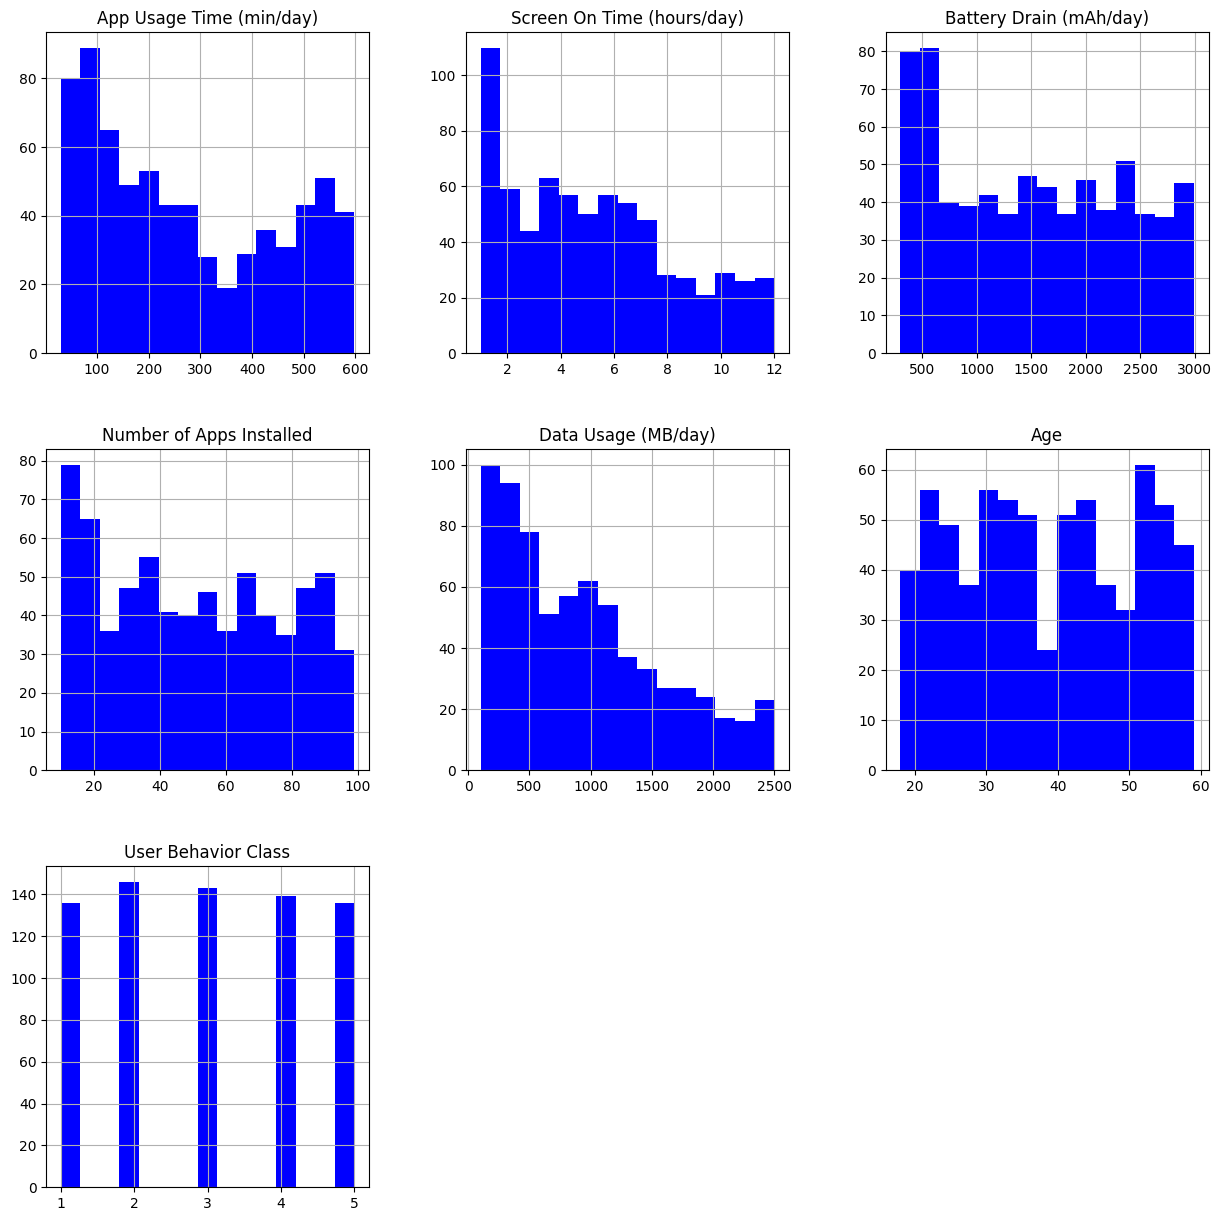

In [19]:
df.hist(bins=15, figsize=(15,15), color='blue')

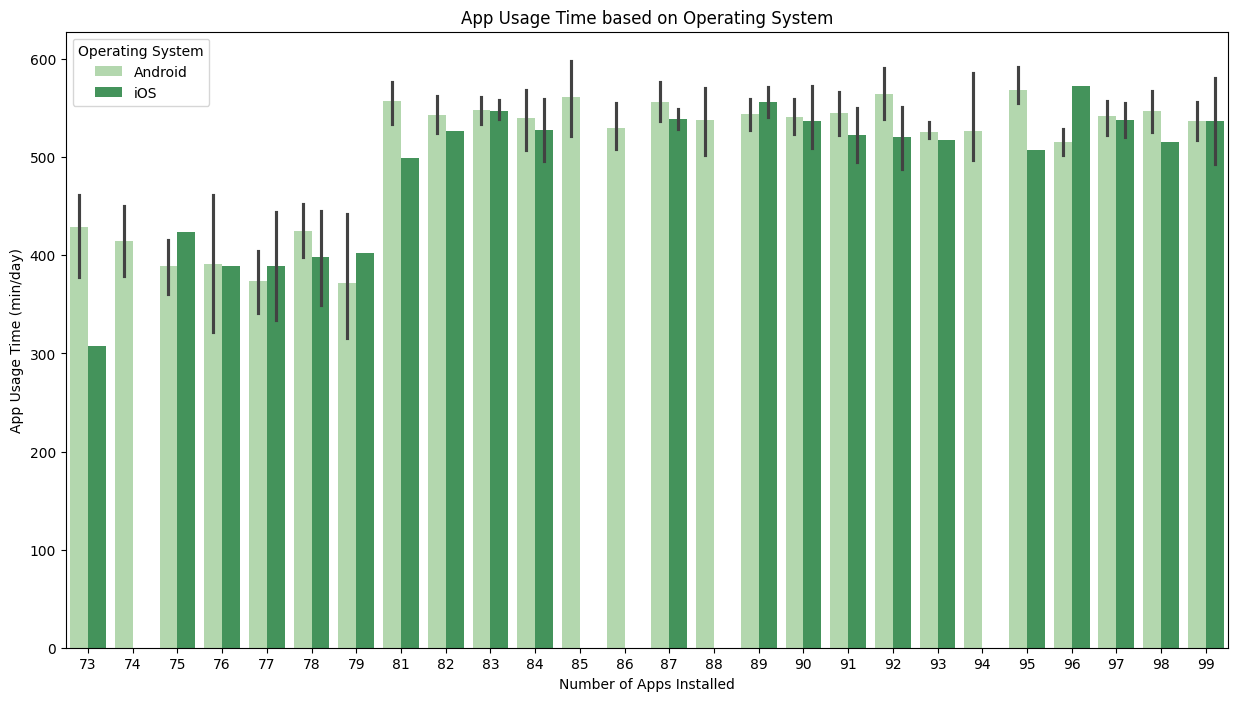

In [44]:
apps_df = df.copy()
plt.figure(figsize=(15,8))
apps_df = apps_df[apps_df['Number of Apps Installed'] > 72]
sns.barplot(data=apps_df, x='Number of Apps Installed', y='App Usage Time (min/day)', hue='Operating System', palette='Greens')
plt.title('App Usage Time based on Operating System')
plt.show()

In [21]:
df['Data Usage (MB/day)'].max()

np.int64(2497)

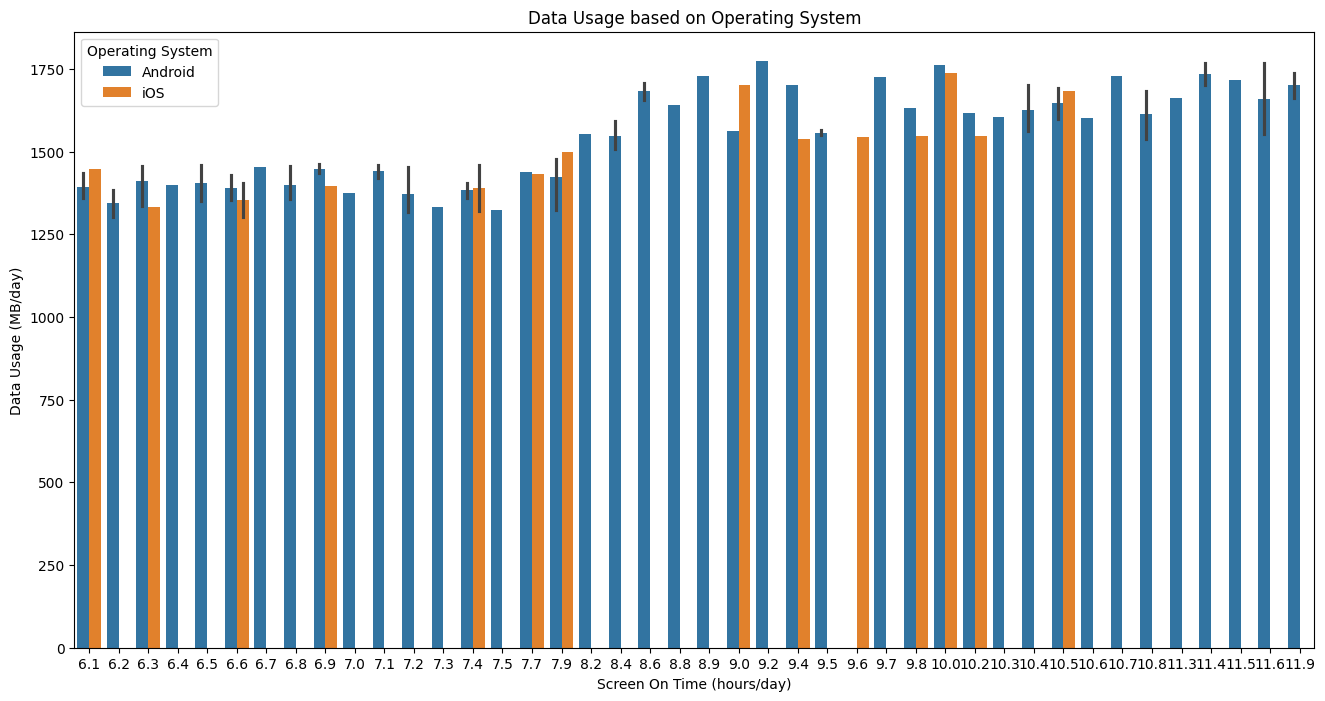

In [46]:
data_usage_df = df.copy()
plt.figure(figsize=(16,8))
data_usage_df = data_usage_df[data_usage_df['Data Usage (MB/day)'] > 1300]
data_usage_df = data_usage_df[data_usage_df['Data Usage (MB/day)'] < 1785]
sns.barplot(data=data_usage_df, x='Screen On Time (hours/day)', y='Data Usage (MB/day)', hue='Operating System')
plt.title('Data Usage based on Operating System')
plt.show()

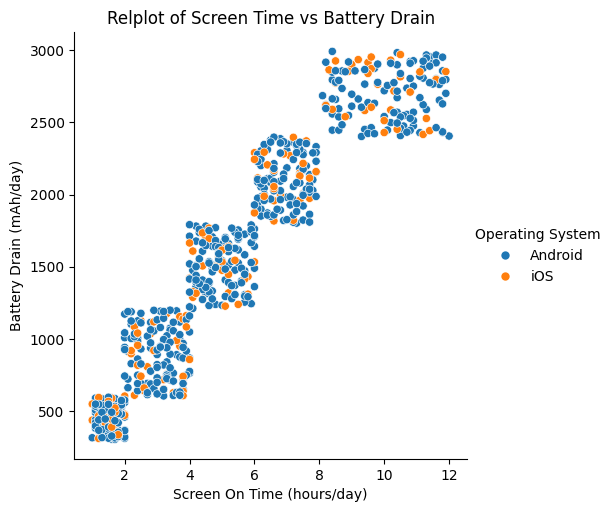

In [48]:
data_df = df.copy()
sns.relplot(data=data_df, x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', hue='Operating System')
plt.title("Relplot of Screen Time vs Battery Drain")
plt.show()